In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob 

In [1]:
# This line of code is to install a text library for processing textual data. 


pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [29]:
# Load data from "reviewed.json"
with open("C:\\Users\\Hanna\\Downloads\\Document\\Youth_s Kid\MSC University of Stirling\\Autum semester\\ITNPBD2\\Assignment python\\jcpenney_reviewers.json", "r") as file:
    reviewed_data = [eval(line) for line in file]

# Load data from "products.json"
with open("C:\\Users\\Hanna\\Downloads\\Document\\Youth_s Kid\\MSC University of Stirling\\Autum semester\\ITNPBD2\\Assignment python\\jcpenney_products.json", "r") as file:
    products_data = [eval(line) for line in file]

# Convert data to pandas DataFrames
reviewed_df = pd.DataFrame(reviewed_data)
products_df = pd.DataFrame(products_data)

In [4]:
import pandas as pd

In [4]:
reviewed_df.head(2)

,Username,DOB,State,Reviewed
0,bkpn1412,31.07.1983,Oregon,[cea76118f6a9110a893de2b7654319c0]
1,gqjs4414,27.07.1998,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3]


In [5]:
products_df.head(2)

,uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews,Bought With
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567..."
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,3.000,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'tpcu2211', 'Review': 'You never hav...","[bc9ab3406dcaa84a123b9da862e6367d, 18eb69e8fc2..."


# Data Cleaning

In [6]:
# Data Cleaning

# Convert date of birth to datetime format in "reviewed.json"
reviewed_df['DOB'] = pd.to_datetime(reviewed_df['DOB'], format='%d.%m.%Y')


In [7]:
# Convert price fields to numeric in "products.json"
products_df['list_price'] = pd.to_numeric(products_df['list_price'], errors='coerce')
products_df['sale_price'] = pd.to_numeric(products_df['sale_price'], errors='coerce')

In [28]:
# Check for Duplicates
duplicates = products_df.duplicated(subset=['uniq_id'])
if duplicates.any():
    print("Duplicates found in products.json")
    products_df = products_df.drop_duplicates(subset=['uniq_id'], keep='first')

# Merging data

In [27]:
# Let’s unpack the "Reviews" column into a standalone dataframe using json_normalize
df_reviews = pd.json_normalize(products_data, record_path="Reviews", meta=["uniq_id"])
df_reviews.head(3)

,User,Review,Score,uniq_id
0,fsdv4141,You never have to worry about the fit...Alfred...,2,b6c0b6bea69c722939585baeac73c13d
1,krpz1113,Good quality fabric. Perfect fit. Washed very ...,4,b6c0b6bea69c722939585baeac73c13d
2,mbmg3241,I do not normally wear pants or capris that ha...,4,b6c0b6bea69c722939585baeac73c13d


In [10]:
# Let’s unpack the "Bought With" column into a standalone dataframe using json_normalize
df_bought_with = pd.json_normalize(products_data, record_path="Bought With", meta=["uniq_id"])
df_bought_with.head(3)

,0,uniq_id
0,898e42fe937a33e8ce5e900ca7a4d924,b6c0b6bea69c722939585baeac73c13d
1,8c02c262567a2267cd207e35637feb1c,b6c0b6bea69c722939585baeac73c13d
2,b62dd54545cdc1a05d8aaa2d25aed996,b6c0b6bea69c722939585baeac73c13d


In [11]:
# Merge the flattened dataframes with the main dataframe
products_df = pd.merge(products_df, df_reviews, how="left", on="uniq_id")
products_df = pd.merge(products_df, df_bought_with, how="left", left_on="uniq_id", right_on="uniq_id", suffixes=('_review', '_bought_with'))
products_df.head(3)

,uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews,Bought With,User,Review,Score,0
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567...",fsdv4141,You never have to worry about the fit...Alfred...,2,898e42fe937a33e8ce5e900ca7a4d924
1,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567...",fsdv4141,You never have to worry about the fit...Alfred...,2,8c02c262567a2267cd207e35637feb1c
2,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567...",fsdv4141,You never have to worry about the fit...Alfred...,2,b62dd54545cdc1a05d8aaa2d25aed996


In [12]:
# Exploding the "Reviewed" column
reviewed_df_exploded = reviewed_df.explode("Reviewed")
reviewed_df_exploded

,Username,DOB,State,Reviewed
0,bkpn1412,1983-07-31,Oregon,cea76118f6a9110a893de2b7654319c0
1,gqjs4414,1998-07-27,Massachusetts,fa04fe6c0dd5189f54fe600838da43d3
2,eehe1434,1950-08-08,Idaho,NaN
3,hkxj1334,1969-08-03,Florida,f129b1803f447c2b1ce43508fb822810
3,hkxj1334,1969-08-03,Florida,3b0c9bc0be65a3461893488314236116
...,...,...,...,...
4997,pdzw1433,1994-07-28,Ohio,799d62906019d910fa744987da184ae7
4997,pdzw1433,1994-07-28,Ohio,b8f5deb7b02f432d30b0a41a2e249957
4997,pdzw1433,1994-07-28,Ohio,64c48841b2f71fb7152e32a3350492b4
4998,npha1342,1953-08-07,Montana,6250b1d691cd3842f05b87736f2fadbf


In [13]:
# Assuming there is a common field between the two datasets (e.g., "Username" and "uniq_id")
merged_df = pd.merge(products_df, reviewed_df_exploded, left_on="uniq_id", right_on="Reviewed", how="left")

In [14]:
merged_df.head(2)

,uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,...,Reviews,Bought With,User,Review,Score,0,Username,DOB,State,Reviewed
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,...,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567...",fsdv4141,You never have to worry about the fit...Alfred...,2,898e42fe937a33e8ce5e900ca7a4d924,yemw3321,1991-07-29,Tennessee,b6c0b6bea69c722939585baeac73c13d
1,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,...,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567...",fsdv4141,You never have to worry about the fit...Alfred...,2,8c02c262567a2267cd207e35637feb1c,yemw3321,1991-07-29,Tennessee,b6c0b6bea69c722939585baeac73c13d


# Price Distribution Analysis

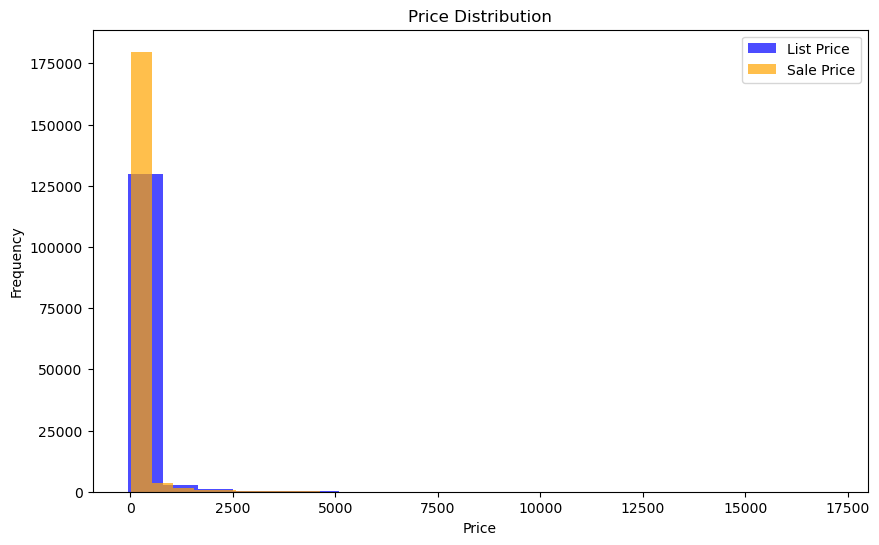

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(products_df['list_price'], bins=20, color='blue', alpha=0.7, label='List Price')
plt.hist(products_df['sale_price'], bins=20, color='orange', alpha=0.7, label='Sale Price')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Category Analysis

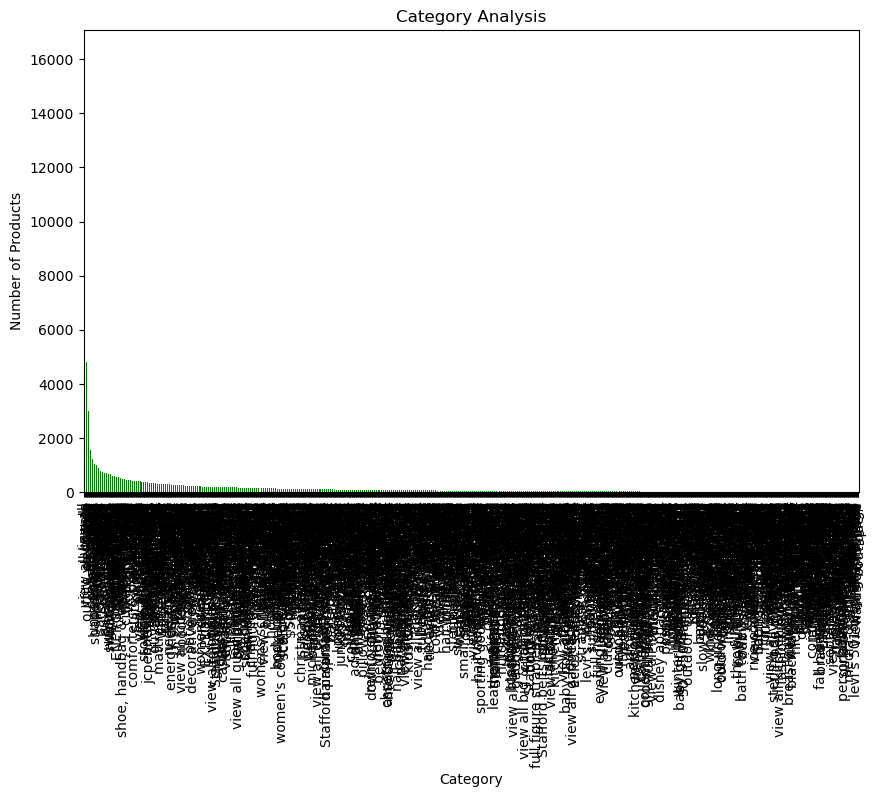

In [16]:
category_counts = products_df['category'].value_counts()
category_counts.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Category Analysis')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

# Average Rating Distribution

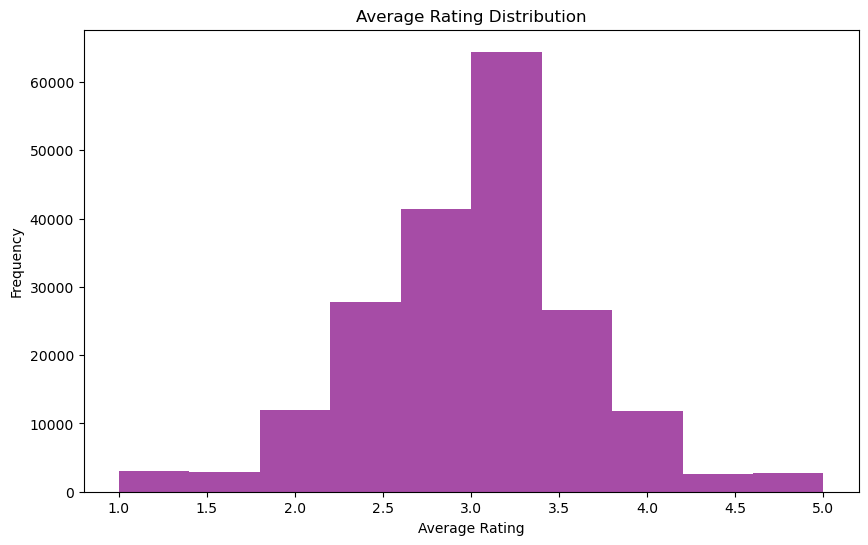

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(products_df['average_product_rating'], bins=10, color='purple', alpha=0.7)
plt.title('Average Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Product Review Analysis

In [18]:
# Identify top-rated products
top_rated_products = products_df.sort_values(by='average_product_rating', ascending=False).head(5)

# Print top-rated products
print("Top-rated Products:")
print(top_rated_products[['name_title', 'average_product_rating']])


Top-rated Products:
                                               name_title  \
134913          Arizona Aree Colorblock Slingback Sandals   
92475   Total Girl® Emory Girls Gladiator Sandals - Li...   
92473   Total Girl® Emory Girls Gladiator Sandals - Li...   
92472   Total Girl® Emory Girls Gladiator Sandals - Li...   
92471   Total Girl® Emory Girls Gladiator Sandals - Li...   

        average_product_rating  
134913                     5.0  
92475                      5.0  
92473                      5.0  
92472                      5.0  
92471                      5.0  


# Age Distribution

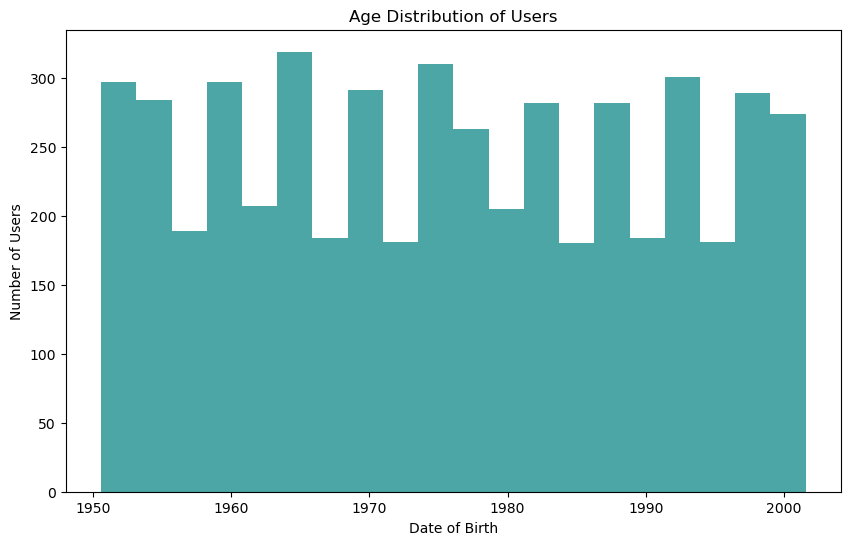

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(reviewed_df['DOB'].dropna(), bins=20, color='teal', alpha=0.7)
plt.title('Age Distribution of Users')
plt.xlabel('Date of Birth')
plt.ylabel('Number of Users')
plt.show()

# Age Group Analysis 

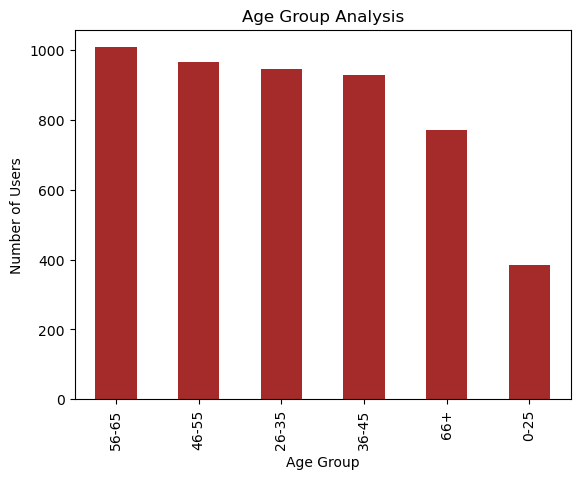

In [20]:
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66+']
reviewed_df['Age_Group'] = pd.cut(pd.to_datetime('today').year - reviewed_df['DOB'].dt.year, bins=bins, labels=labels)
age_group_counts = reviewed_df['Age_Group'].value_counts()
age_group_counts.plot(kind='bar', color='brown')
plt.title('Age Group Analysis')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.show()


# User Review Sentiment Analysis

In [30]:
merged_df.head(2)

,uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,...,Bought With,User,Review,Score,0,Username,DOB,State,Reviewed,Review_Sentiment
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,...,"[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567...",fsdv4141,You never have to worry about the fit...Alfred...,2,898e42fe937a33e8ce5e900ca7a4d924,yemw3321,1991-07-29,Tennessee,b6c0b6bea69c722939585baeac73c13d,0.575
1,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,...,"[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567...",fsdv4141,You never have to worry about the fit...Alfred...,2,8c02c262567a2267cd207e35637feb1c,yemw3321,1991-07-29,Tennessee,b6c0b6bea69c722939585baeac73c13d,0.575


In [22]:
def sentiment_analysis(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

merged_df['Review_Sentiment'] = merged_df['Review'].apply(sentiment_analysis)

# Review Counts

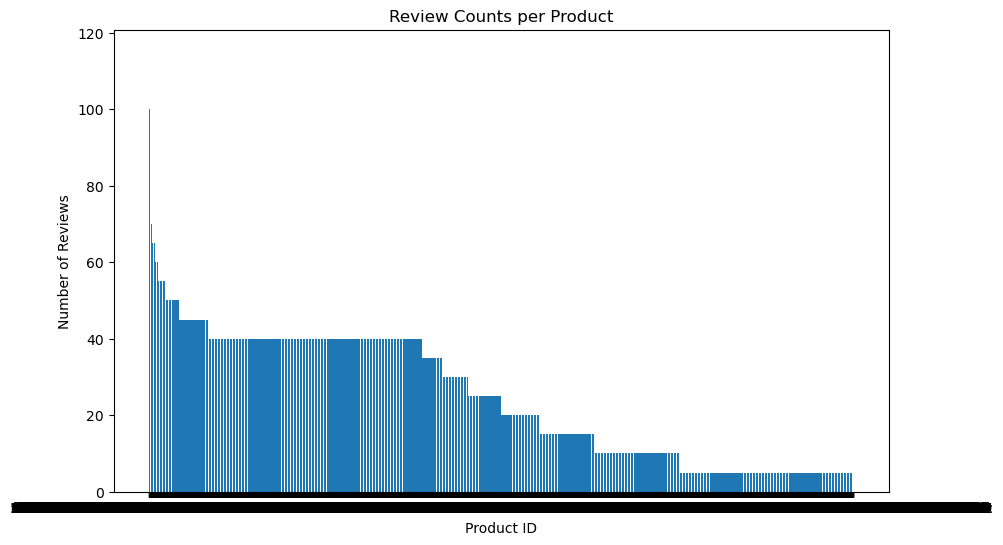

In [23]:
review_counts = merged_df['uniq_id'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(review_counts.index, review_counts.values)
plt.title('Review Counts per Product')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.show()

# Review Statistics

In [24]:
review_stats = merged_df.groupby('uniq_id')['Score'].agg(['count', 'mean', 'std'])
review_stats = review_stats.rename(columns={'count': 'Review_Count', 'mean': 'Mean_Score', 'std': 'Std_Dev_Score'})
print("Review Statistics:")
print(review_stats)

Review Statistics:
                                  Review_Count  Mean_Score  Std_Dev_Score
uniq_id                                                                  
000bde718ab945188a364aab4d8bcfaa            40    2.750000       1.315587
000d4454259343ead2729c56f01b63dd             5    3.000000       0.000000
000db764b3c4f52badbe24ce4c79bb31            45    2.222222       1.329540
001221f2f59bebae47ddbd7ae2472410            15    2.666667       1.290994
0017caf0fa3f54f4e9cf99f9238d3a16            20    3.750000       0.444262
...                                        ...         ...            ...
ffcb9d8bcae951a1a9bfd701824fb40c            15    2.666667       0.487950
ffd0291168a5aae78274bb933278b960            25    3.400000       1.040833
ffd6549fb9066c10c6a644e3b7858f6f            40    4.125000       1.380960
ffd7897d9566ab82d72cf51a26757b15            15    5.000000       0.000000
fff1c1cf7f7c03de9f8ecf5e562cc3ff            40    3.000000       1.519109

[7982 rows x 3 col

# User Review Analysis

In [39]:
# Identify Most Reviewed Items
most_reviewed_items = merged_df['Reviewed'].value_counts().head(5)
print("Most Reviewed Items:")
print(most_reviewed_items)

Most Reviewed Items:
Reviewed
7376425db74399716d23f1cc0c59684c    115
6c40fb8c09f9b94ef12003656c808cf1    115
2ce274384d293748bbf8bdebbc0aa145    115
867b08603fa032314919f0d7b5d47ad6    110
0db3122709238f7154dffa1baeedee3f    105
Name: count, dtype: int64


In [ ]:
# Review Trends Over Time
# Assuming there is a timestamp associated with the reviews
review_trends = merged_df.groupby(pd.to_datetime(merged_df['Timestamp']).dt.to_period("M")).size()
plt.figure(figsize=(10, 6))
review_trends.plot(kind='line', marker='o')
plt.title('Review Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

# State-based Analysis

In [ ]:
state_review_counts = merged_df['State'].value_counts()

# Plotting Distribution of States
plt.figure(figsize=(12, 6))
state_review_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:

# Analyzing Review Patterns Among Different States
state_average_rating = merged_df.groupby('State')['average_product_rating'].mean()
state_review_counts = merged_df.groupby('State').size()

# Displaying Average Rating and Review Counts by State
state_analysis = pd.DataFrame({'Average_Rating': state_average_rating, 'Review_Counts': state_review_counts})
state_analysis = state_analysis.sort_values(by='Average_Rating', ascending=False)

print("State-based Analysis:")
print(state_analysis)